In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-tourism-receipts/tourism-recipts.csv


In [2]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=7e1a41225f7d71b9366634cee011cf39bf0d75095b4a04038c80f9baa85a0682
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
from pyspark import SparkContext
sc = SparkContext("local", "first app")

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark Create RDD example").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/26 11:23:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
df = spark.read.csv("/kaggle/input/international-tourism-receipts/tourism-recipts.csv", inferSchema=True, header=True)
df.show()

+-----------+----+----+-------+
|       name|code|year|value_$|
+-----------+----+----+-------+
|Afghanistan| AFG|2008|  5.7E7|
|Afghanistan| AFG|2009|  8.9E7|
|Afghanistan| AFG|2010| 1.47E8|
|Afghanistan| AFG|2011| 1.65E8|
|Afghanistan| AFG|2012| 1.67E8|
|Afghanistan| AFG|2013| 1.79E8|
|Afghanistan| AFG|2014| 1.21E8|
|Afghanistan| AFG|2015|  8.6E7|
|Afghanistan| AFG|2016|  6.2E7|
|Afghanistan| AFG|2017|  1.6E7|
|Afghanistan| AFG|2018|  5.0E7|
|Afghanistan| AFG|2019|  8.5E7|
|Afghanistan| AFG|2020|  7.5E7|
|    Albania| ALB|1995|  7.0E7|
|    Albania| ALB|1996|  9.4E7|
|    Albania| ALB|1997|  3.4E7|
|    Albania| ALB|1998|  6.0E7|
|    Albania| ALB|1999| 2.18E8|
|    Albania| ALB|2000| 3.98E8|
|    Albania| ALB|2001| 4.51E8|
+-----------+----+----+-------+
only showing top 20 rows



In [5]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- code: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- value_$: double (nullable = true)



In [6]:
df_2 = df.withColumnRenamed('value_$','value')

In [7]:
df_2.createOrReplaceTempView("tourism_yearly")

In [8]:
final_df = spark.sql("""SELECT name,year, SUM(value) as yearly_income FROM tourism_yearly GROUP BY name,year ORDER BY year DESC""")

In [9]:
final_df.show()

+-------------+----+------------------+
|         name|year|     yearly_income|
+-------------+----+------------------+
|      Ecuador|2020|            7.05E8|
|      Austria|2020|         1.5362E10|
|       Israel|2020|           2.661E9|
|    Guatemala|2020|           2.985E8|
|       Angola|2020|             1.9E7|
|     Eswatini|2020|  7300000.19073486|
|      Nigeria|2020|            3.21E8|
|  Philippines|2020|           2.769E9|
|        Samoa|2020|2.30599994659424E7|
|      Ireland|2020|            4.16E9|
|      Uruguay|2020|           1.085E9|
|       Uganda|2020|            5.18E8|
|    Australia|2020|         2.6234E10|
|       Cyprus|2020|            6.63E8|
|      Albania|2020|           1.243E9|
|      Algeria|2020|             5.0E7|
|       Jordan|2020|           1.745E9|
|Côte d'Ivoire|2020|1.99300003051758E8|
|       Kuwait|2020|            5.24E8|
|       Malawi|2020|             3.5E7|
+-------------+----+------------------+
only showing top 20 rows



In [10]:
final_df.describe().show()

+-------+-----------+------------------+--------------------+
|summary|       name|              year|       yearly_income|
+-------+-----------+------------------+--------------------+
|  count|       4156|              4156|                4156|
|   mean|       null|2007.6371511068335| 4.919326950140594E9|
| stddev|       null| 7.308120269253006|1.498053630858636E10|
|    min|Afghanistan|              1995|            100000.0|
|    max|   Zimbabwe|              2020|          2.41984E11|
+-------+-----------+------------------+--------------------+



In [30]:
df_ana = spark.sql("""
    SELECT t1.name, t1.year, t1.value as yearly_income
    FROM tourism_yearly t1
    INNER JOIN (
        SELECT year, MAX(value) as max_value
        FROM tourism_yearly
        GROUP BY year
    ) t2
    ON t1.year = t2.year AND t1.value = t2.max_value
    ORDER BY t1.year DESC
""")


In [31]:
df_ana.show()

+-------------+----+-------------+
|         name|year|yearly_income|
+-------------+----+-------------+
|United States|2020|    8.4205E10|
|United States|2019|   2.39447E11|
|United States|2018|   2.41984E11|
|United States|2017|   2.33758E11|
|United States|2016|   2.28549E11|
|United States|2015|   2.30574E11|
|United States|2014|   2.22746E11|
|United States|2013|   2.13105E11|
|United States|2012|   1.95113E11|
|United States|2011|   1.78935E11|
|United States|2010|   1.61821E11|
|United States|2009|   1.37111E11|
|United States|2008|   1.49094E11|
|United States|2007|     1.348E11|
|United States|2006|    1.2103E11|
|United States|2005|   1.16682E11|
|United States|2004|    1.0721E11|
|United States|2003|    9.4814E10|
|United States|2002|    9.7415E10|
|United States|2001|   1.05454E11|
+-------------+----+-------------+
only showing top 20 rows



In [32]:
spark.sql("""
    SELECT t1.name, t1.year, t1.value as yearly_income
    FROM tourism_yearly t1
    INNER JOIN (
        SELECT year, MIN(value) as min_value
        FROM tourism_yearly
        GROUP BY year
    ) t2
    ON t1.year = t2.year AND t1.value = t2.min_value
    ORDER BY t1.year DESC
""").show()

+--------------------+----+------------------+
|                name|year|     yearly_income|
+--------------------+----+------------------+
|              Guinea|2020|  1289999.96185303|
|              Guinea|2019|1.03999996185303E7|
|               Nauru|2018|         1600000.0|
|               Nauru|2017|         3900000.0|
|    Papua New Guinea|2016|  1600000.02384186|
|Congo, The Democr...|2015|          100000.0|
|    Papua New Guinea|2014|  2799999.95231628|
|               Nauru|2013|         1500000.0|
|               Nauru|2012|         1000000.0|
|               Nauru|2011|         1000000.0|
|               Nauru|2010|          600000.0|
|               Nauru|2009|          500000.0|
|               Nauru|2008|          600000.0|
|Congo, The Democr...|2007|          700000.0|
|              Tuvalu|2006|         1200000.0|
|              Tuvalu|2005|         1200000.0|
|             Burundi|2004|  1799999.95231628|
|             Burundi|2003|  1200000.04768372|
|     Solomon

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df_america = spark.sql('SELECT year,value FROM tourism_yearly WHERE name="United States" ORDER BY year ')

In [39]:
df_america.show()

+----+----------+
|year|     value|
+----+----------+
|1995| 9.3743E10|
|1996|1.02196E11|
|1997|1.07047E11|
|1998|1.05095E11|
|1999|1.09188E11|
|2000|1.18316E11|
|2001|1.05454E11|
|2002| 9.7415E10|
|2003| 9.4814E10|
|2004| 1.0721E11|
|2005|1.16682E11|
|2006| 1.2103E11|
|2007|  1.348E11|
|2008|1.49094E11|
|2009|1.37111E11|
|2010|1.61821E11|
|2011|1.78935E11|
|2012|1.95113E11|
|2013|2.13105E11|
|2014|2.22746E11|
+----+----------+
only showing top 20 rows



In [42]:
df_pd_america = df_america.toPandas()

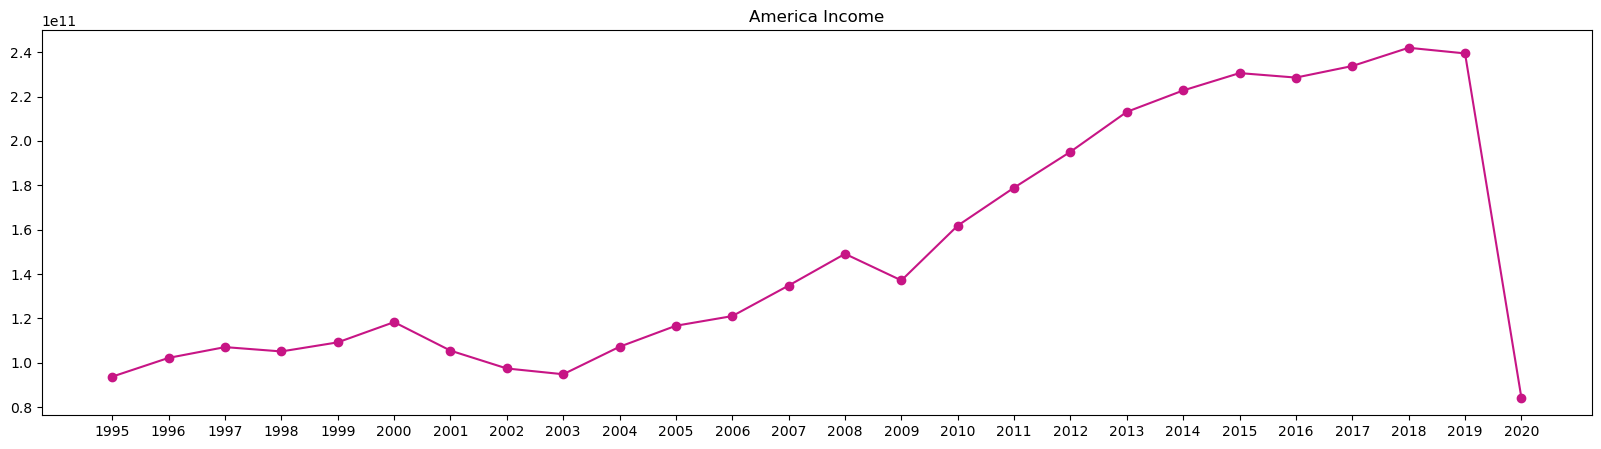

In [62]:
plt.figure(figsize=(20,5))
plt.plot( 'year', 'value', data=df_pd_america, marker='o', color='mediumvioletred')
plt.xticks(np.arange(1995,2021,1))
plt.title('America Income')
plt.show()

In [57]:
df_Nauru = spark.sql('SELECT year, value FROM tourism_yearly WHERE name ="Nauru" ORDER BY year')

In [58]:
df_Nauru.show()

+----+---------+
|year|    value|
+----+---------+
|2008| 600000.0|
|2009| 500000.0|
|2010| 600000.0|
|2011|1000000.0|
|2012|1000000.0|
|2013|1500000.0|
|2014|6800000.0|
|2015|1700000.0|
|2016|3400000.0|
|2017|3900000.0|
|2018|1600000.0|
+----+---------+



In [59]:
df_Nauru_pd = df_Nauru.toPandas()

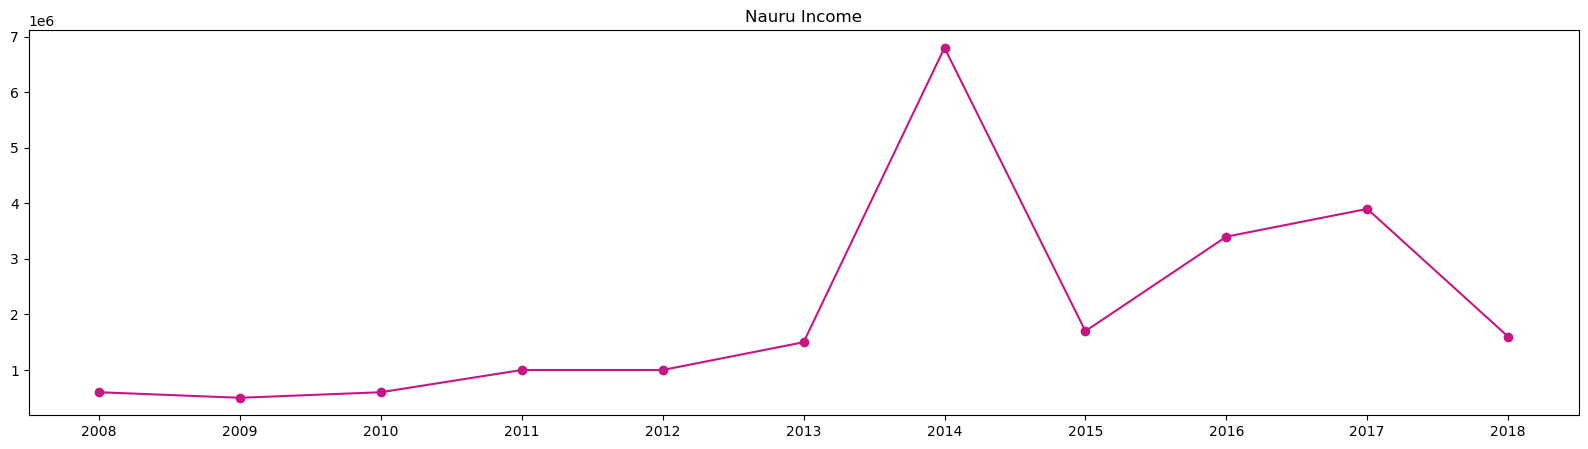

In [61]:
plt.figure(figsize=(20,5))
plt.plot( 'year', 'value', data=df_Nauru_pd, marker='o', color='mediumvioletred')
plt.xticks(np.arange(2008,2019,1))
plt.title('Nauru Income')
plt.show()